In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
reviews = pd.read_csv('../Niteo/Reviews.csv')

In [5]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
review_df = reviews.loc[0::,['ProductId','UserId','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']]

In [7]:
review_df.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600


In [8]:
review_df=review_df.rename(columns={'HelpfulnessNumerator':'HelpNum','HelpfulnessDenominator':'HelpDenum'})

In [9]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600


In [10]:
review_df['Unhelp']=review_df['HelpDenum'] - review_df['HelpNum']

In [11]:
review_df.sample(20)

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp
66008,B0007A0AQW,A3M7OULJPOY5CR,0,0,5,1302998400,0
345818,B004Z2SIXU,A1NHSKWQNROEP6,0,0,5,1349568000,0
558366,B001KTA03C,A2BAVMF7WEYHWR,0,0,5,1333929600,0
301452,B0001CXUDG,A3RKVY2NPLP0C8,1,1,5,1274313600,0
94439,B000EQYW0E,A19LPZA84LGD98,2,2,1,1275782400,0
349554,B0000CFPI2,A1UBM518PBJ0H,1,1,5,1326067200,0
295644,B001E5E1WS,A7Y9MP7H8LYUE,0,0,5,1224720000,0
270287,B00295EM12,A186TK5S0LAZ7O,3,3,4,1265414400,0
174114,B0006MWNP2,A1XW6CL6JGBJ60,0,0,5,1301270400,0
203488,B000CQC04Q,A1SO1PGDNVMLXC,3,3,5,1284768000,0


In [12]:
review_df.ProductId.describe()

count         568454
unique         74258
top       B007JFMH8M
freq             913
Name: ProductId, dtype: object

In [13]:
prod_score = review_df.loc[0::,['ProductId','Score']]

In [14]:
prod_score_grp = prod_score.groupby('ProductId')

In [15]:
dummy=prod_score_grp.mean()

In [16]:
dummy.head()

,Score
ProductId,
141278509X,5.000000
2734888454,3.500000
2841233731,5.000000
6641040,4.351351
7310172001,4.751445


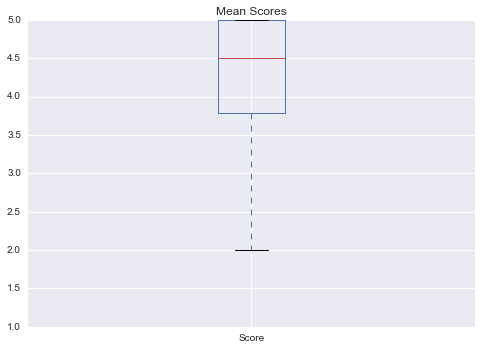

In [17]:
dummy.plot(kind='box',title='Mean Scores')
#see average reviews of the foods

In [18]:
#see how many of each score there are
score_grp = prod_score.groupby('Score')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C593780>], dtype=object)

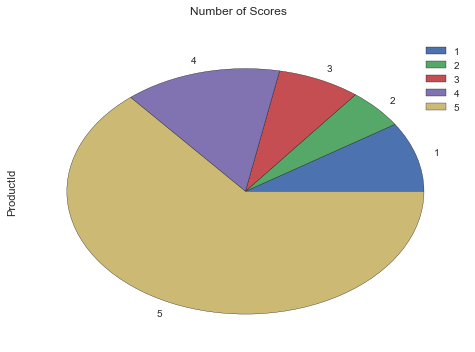

In [19]:
score_grp.count().plot(kind='pie',subplots=True,title='Number of Scores')

In [20]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,0
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,0
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,0
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,0


In [21]:
review_df['Time']=pd.to_datetime(review_df['Time'],unit='s')

In [22]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0


In [23]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 7 columns):
ProductId    568454 non-null object
UserId       568454 non-null object
HelpNum      568454 non-null int64
HelpDenum    568454 non-null int64
Score        568454 non-null int64
Time         568454 non-null datetime64[ns]
Unhelp       568454 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 30.4+ MB


In [24]:
review_df['month']=review_df.Time.dt.month

In [25]:
review_df['year']=review_df.Time.dt.year

In [26]:
review_df['day']=review_df.Time.dt.day

In [27]:
review_df['day_of_week']=review_df.Time.dt.dayofweek

In [28]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6


In [29]:
review_df.UserId.describe()

count             568454
unique            256059
top       A3OXHLG6DIBRW8
freq                 448
Name: UserId, dtype: object

In [30]:
#see if users have significantly different averages
user_scr = review_df.loc[0::,['UserId','Score']]

In [31]:
user_scr_grp = user_scr.groupby('UserId')

In [32]:
user_scr_grp.UserId.count()

UserId
#oc-R103C0QSV1DF5E    1
#oc-R109MU5OBBZ59U    1
#oc-R10LFEMQEW6QGZ    1
#oc-R10LT57ZGIB140    1
#oc-R10UA029WVWIUI    1
#oc-R115TNMSPFT9I7    2
#oc-R119LM8D59ZW8Y    1
#oc-R11D9D7SHXIJB9    3
#oc-R11D9LKDAN5NQJ    1
#oc-R11DNU2NBKQ23Z    2
#oc-R11O5J5ZVQE25C    3
#oc-R11PW3CFBB4BEP    1
#oc-R11T1PHWNO7KEZ    1
#oc-R120LO6OLNDPCG    1
#oc-R12KPBODL2B5ZD    2
#oc-R12MGTQS5KZZRV    3
#oc-R12N3533IO3B79    1
#oc-R13EBF129DBX88    2
#oc-R13NNUL4EKL4FL    3
#oc-R13X3YIJ6GLT0C    1
#oc-R1493EDK6REQ02    1
#oc-R149FDXLRARCWJ    1
#oc-R14VLCY75KIBSB    1
#oc-R14ZSRYW2YB41B    3
#oc-R14ZUK54VMOGJS    1
#oc-R1522DF2LUL4G1    1
#oc-R152UR09M996EM    1
#oc-R15343ZW0UTLMR    2
#oc-R155JB2SA58E17    3
#oc-R15LBVAVIE5O2X    1
                     ..
AZZFEH7BWEWRD         1
AZZFJQFHITBZ5         3
AZZFLKZ198VZV         1
AZZFRY8O72WH8         1
AZZH3GGYQSBUC         2
AZZHZZMH3U1VB         4
AZZJDUEFXYXBM         4
AZZLMJ88R9HPH         1
AZZMDW27MUJR6         2
AZZMO52V8WZ68         2
AZZNK89PX

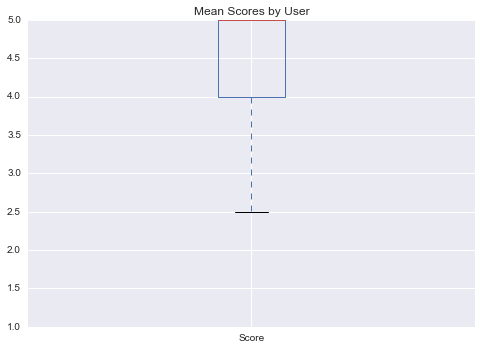

In [33]:
user_scr_grp.mean().plot(kind='box',title='Mean Scores by User')

In [34]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [35]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6


In [36]:
#if year has effect on review score
year_scr = review_df.loc[0::,['Score','year']]

In [37]:
year_scr_grp = year_scr.groupby('year')

In [38]:
year_scr_grp.describe()

Score
year                     
1999 count       6.000000
     mean        5.000000
     std         0.000000
     min         5.000000
     25%         5.000000
     50%         5.000000
     75%         5.000000
     max         5.000000
2000 count      32.000000
     mean        4.531250
     std         1.190944
     min         1.000000
     25%         5.000000
     50%         5.000000
     75%         5.000000
     max         5.000000
2001 count      13.000000
     mean        3.538462
     std         1.713446
     min         1.000000
     25%         2.000000
     50%         4.000000
     75%         5.000000
     max         5.000000
2002 count      73.000000
     mean        4.712329
     std         0.676582
     min         2.000000
     25%         5.000000
     50%         5.000000
...                   ...
2009 std         1.213693
     min         1.000000
     25%         4.000000
     50%         5.000000
     75%         5.000000
     max         5.000000
2010 count   85884.000000
     mean        4.198838
     std         1.311198
     min         1.000000
     25%         4.000000
     50%         5.000000
     75%         5.000000
     max         5.000000
2011 count  163299.000000
     mean        4.143804
     std         1.335413
     min         1.000000
     25%         4.000000
     50%         5.000000
     75%         5.000000
     max         5.000000
2012 count  198659.000000
     mean        4.117885
     std         1.352745
     min         1.000000
     25%         4.000000
     50%         5.000000
     75%         5.000000
     max         5.000000

[112 rows x 1 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018879940>], dtype=object)

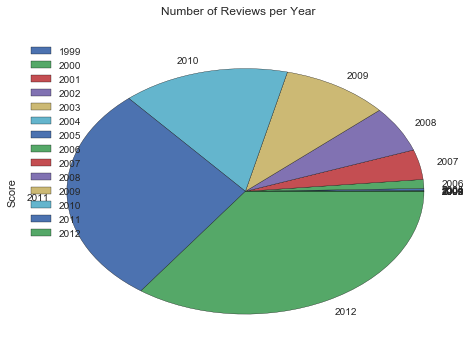

In [39]:
#which year has the most reviews
year_scr_grp.count().plot(kind='pie',subplots=True,title='Number of Reviews per Year')

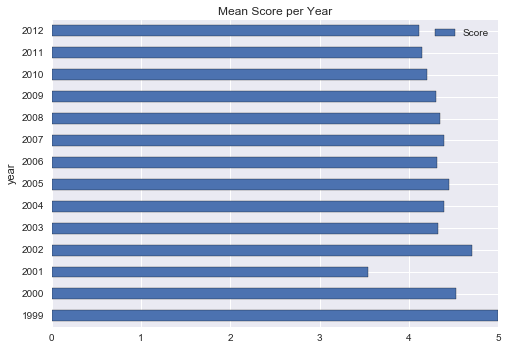

In [40]:
#which year has the best mean score
year_scr_grp.mean().plot(kind='barh',title='Mean Score per Year')

In [41]:
#which months/days of the week are the most correlated
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6


In [42]:
month_scr = review_df.loc[0::,['Score','month','day_of_week']]

In [43]:
month_scr_grp = month_scr.groupby(['month','day_of_week'])

In [44]:
dummy=month_scr_grp.mean().unstack()

Score                                                    \
day_of_week               0         1         2         3         4         5   
      day_of_week                                                               
Score 0            1.000000 -0.235331  0.306484  0.393085  0.532605  0.124681   
      1           -0.235331  1.000000  0.081937  0.107796 -0.328642  0.152307   
      2            0.306484  0.081937  1.000000  0.668665  0.351051  0.119341   
      3            0.393085  0.107796  0.668665  1.000000  0.238694  0.186930   
      4            0.532605 -0.328642  0.351051  0.238694  1.000000 -0.110360   
      5            0.124681  0.152307  0.119341  0.186930 -0.110360  1.000000   
      6            0.510097  0.199567  0.404771  0.784756  0.180753  0.261411   

                             
day_of_week               6  
      day_of_week            
Score 0            0.510097  
      1            0.199567  
      2            0.404771  
      3            0.784756  
      4            0.180753  
      5            0.261411  
      6            1.000000

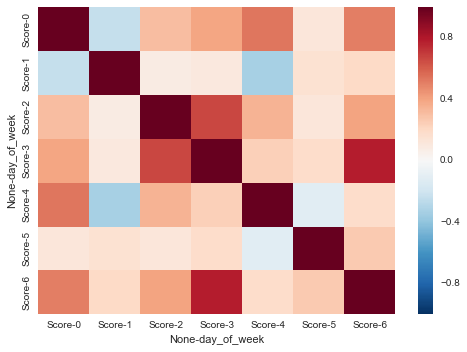

In [45]:
sns.heatmap(dummy.corr())
dummy.corr()

In [46]:
month_scr_grp = month_scr.groupby(['day_of_week','month'])

In [47]:
dum_corr = month_scr_grp.mean().unstack()

In [48]:
dum_corr

Score                                                    \
month              1         2         3         4         5         6    
day_of_week                                                               
0            4.142100  4.186965  4.195615  4.185353  4.244722  4.190560   
1            4.172022  4.165284  4.188902  4.228846  4.171092  4.176815   
2            4.144138  4.159288  4.137640  4.172634  4.170213  4.146005   
3            4.191663  4.141830  4.152818  4.167652  4.191225  4.116557   
4            4.155035  4.184272  4.174914  4.146076  4.228553  4.151063   
5            4.188217  4.198359  4.218006  4.250792  4.213798  4.213284   
6            4.262246  4.236214  4.225384  4.275325  4.263773  4.174718   

                                                                         
month              7         8         9         10        11        12  
day_of_week                                                              
0            4.239565  4.203891  4.238800  4.118572  4.243049  4.111323  
1            4.182862  4.217455  4.125128  4.193778  4.183699  4.180980  
2            4.145121  4.137131  4.150562  4.161168  4.189746  4.142694  
3            4.118938  4.139501  4.127482  4.140835  4.229730  4.071386  
4            4.202480  4.189669  4.199625  4.193834  4.213479  4.178235  
5            4.218729  4.175482  4.206739  4.271010  4.147668  4.088425  
6            4.211562  4.277573  4.241028  4.200542  4.268307  4.142466

Score                                                    \
month              1         2         3         4         5         6    
      month                                                               
Score 1      1.000000  0.630706  0.588805  0.741535  0.464726  0.076267   
      2      0.630706  1.000000  0.853683  0.695923  0.825204  0.613090   
      3      0.588805  0.853683  1.000000  0.812790  0.687816  0.796466   
      4      0.741535  0.695923  0.812790  1.000000  0.311213  0.644998   
      5      0.464726  0.825204  0.687816  0.311213  1.000000  0.362804   
      6      0.076267  0.613090  0.796466  0.644998  0.362804  1.000000   
      7      0.060839  0.749173  0.797484  0.408059  0.713092  0.845474   
      8      0.632098  0.822396  0.793111  0.677566  0.671614  0.459075   
      9      0.276111  0.851933  0.692856  0.337858  0.928511  0.580357   
      10     0.367862  0.450703  0.549120  0.589729  0.045059  0.550612   
      11     0.406439  0.324375  0.106608 -0.026445  0.630117 -0.327440   
      12    -0.128267  0.157634 -0.008332 -0.041055 -0.069511  0.018993   

                                                                         
month              7         8         9         10        11        12  
      month                                                              
Score 1      0.060839  0.632098  0.276111  0.367862  0.406439 -0.128267  
      2      0.749173  0.822396  0.851933  0.450703  0.324375  0.157634  
      3      0.797484  0.793111  0.692856  0.549120  0.106608 -0.008332  
      4      0.408059  0.677566  0.337858  0.589729 -0.026445 -0.041055  
      5      0.713092  0.671614  0.928511  0.045059  0.630117 -0.069511  
      6      0.845474  0.459075  0.580357  0.550612 -0.327440  0.018993  
      7      1.000000  0.636046  0.841335  0.294628  0.081680  0.183047  
      8      0.636046  1.000000  0.582082  0.203952  0.491616  0.413415  
      9      0.841335  0.582082  1.000000  0.143731  0.403938 -0.049028  
      10     0.294628  0.203952  0.143731  1.000000 -0.599942  0.081981  
      11     0.081680  0.491616  0.403938 -0.599942  1.000000  0.010683  
      12     0.183047  0.413415 -0.049028  0.081981  0.010683  1.000000

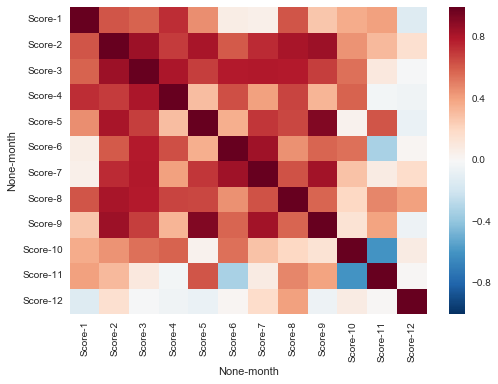

In [49]:
sns.heatmap(dum_corr.corr())
dum_corr.corr()

In [50]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6


In [51]:
#when in the month the most/best reviews occur
def weeks(x):
    if x<=8:
        return 1
    elif x<=15:
        return 2
    elif x<=23:
        return 3
    elif x>23:
        return 4
review_df['week']=review_df.day.apply(weeks)

In [52]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3


In [53]:
week_scr = review_df.loc[0::,['Score','week']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015664EB8>], dtype=object)

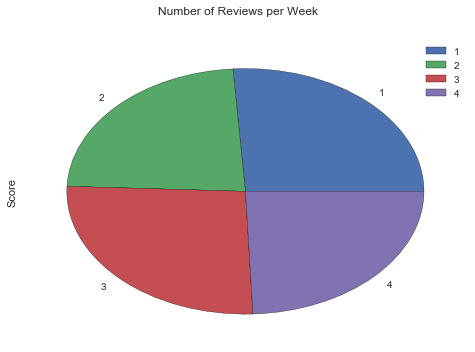

In [54]:
week_scr_grp = week_scr.groupby('week')
week_scr_grp.count().plot(kind='pie',subplots=True,title='Number of Reviews per Week')

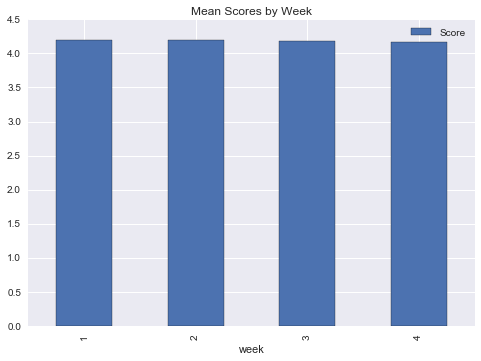

In [55]:
week_scr_grp.mean().plot(kind='bar',title='Mean Scores by Week')

In [56]:
review_df.sample(20)

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week
173407,B006N3I0N2,ABYVECXXSP6R5,0,0,5,2010-06-17,0,6,2010,17,3,3
557301,B003P9XFW8,A2U2L9509BZZCJ,3,3,5,2011-10-22,0,10,2011,22,5,3
35082,B001FA1LL6,A27RTX1G2N9446,2,2,5,2010-12-11,0,12,2010,11,5,2
166019,B001L4EMBC,A3IHWV4H4JFKGO,1,2,5,2011-06-07,1,6,2011,7,1,1
218424,B002UTCI2M,A6AC8EOYP7T50,0,0,5,2012-03-02,0,3,2012,2,4,1
359620,B007M832YY,AIQZWUEP9WOEI,0,0,5,2010-10-10,0,10,2010,10,6,2
473236,B008FHUKE6,ACQW713LZ52A1,0,0,5,2012-07-13,0,7,2012,13,4,2
120226,B0038B3AAK,A1MNX7GPLYA3MQ,4,4,5,2011-12-03,0,12,2011,3,5,1
93222,B004OLKF6K,A33WX0DNKQ39NW,0,1,3,2011-09-01,1,9,2011,1,3,1
174604,B001II46YO,ABDQ5SK3WW9XZ,2,3,2,2009-06-01,1,6,2009,1,0,1


In [57]:
review_df['Text_Len']=reviews.Text.apply(lambda x:len(x))

In [58]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140


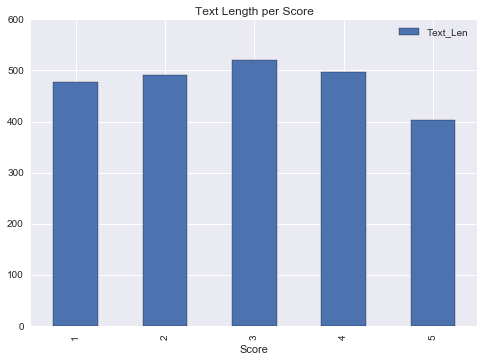

In [59]:
#Does Text length correlate to score?
len_scr = review_df.loc[0::,['Score','Text_Len']]
len_scr_grp = len_scr.groupby('Score')
len_scr_grp.mean().plot(kind='bar',title='Text Length per Score')

In [60]:
#Does length of text correlate to its helpfulness?
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140


In [61]:
review_df.Unhelp.describe()

count    568454.000000
mean          0.484993
std           1.905591
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         140.000000
Name: Unhelp, dtype: float64

In [62]:
review_df.HelpNum.describe()

count    568454.000000
mean          1.743817
std           7.636513
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpNum, dtype: float64

In [63]:
#Number of exclamation points relating to score
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [64]:
def countExclam(x):
    x=x.lower()
    cnt=0
    for i in x:
        if i=='!':
            cnt+=1
    return cnt
review_df['Exclam_Count']=reviews.Text.apply(countExclam)

In [65]:
review_df.head(10)

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263,0
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190,0
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509,0
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140,0
5,B006K2ZZ7K,ADT0SRK1MGOEU,0,0,4,2012-07-12,0,7,2012,12,3,2,416,1
6,B006K2ZZ7K,A1SP2KVKFXXRU1,0,0,5,2012-06-20,0,6,2012,20,2,3,304,2
7,B006K2ZZ7K,A3JRGQVEQN31IQ,0,0,5,2012-05-03,0,5,2012,3,3,1,140,2
8,B000E7L2R4,A1MZYO9TZK0BBI,1,1,5,2011-11-23,0,11,2011,23,2,3,131,0
9,B00171APVA,A21BT40VZCCYT4,0,0,5,2012-10-26,0,10,2012,26,4,4,137,0


In [66]:
scr_ex = review_df.loc[0::,['Score','Exclam_Count']]

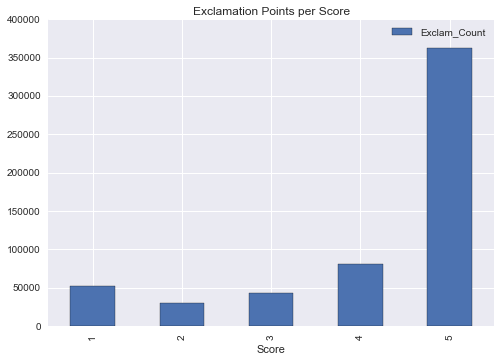

In [67]:
scr_ex_grp = scr_ex.groupby('Score')
scr_ex_grp.count().plot(kind='bar',title='Exclamation Points per Score')

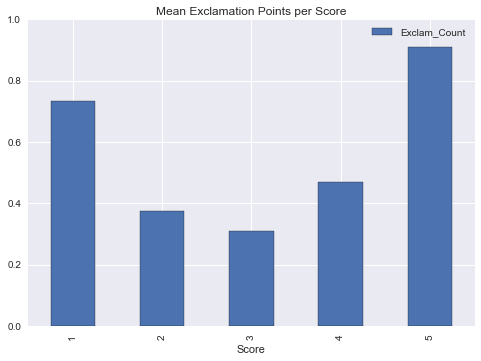

In [68]:
scr_ex_grp = scr_ex.groupby('Score')
scr_ex_grp.mean().plot(kind='bar',title='Mean Exclamation Points per Score')

In [69]:
#Capital Letters in Summary affecting score
def CountCapital(x):
    caps='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    x=str(x)
    cnt=0
    for let in x:
        if let in caps:
            cnt+=1
    return cnt
review_df['Cap_Count']=reviews.Summary.apply(CountCapital)
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Cap_Count
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263,0,4
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190,0,2
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509,0,1
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219,0,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140,0,1


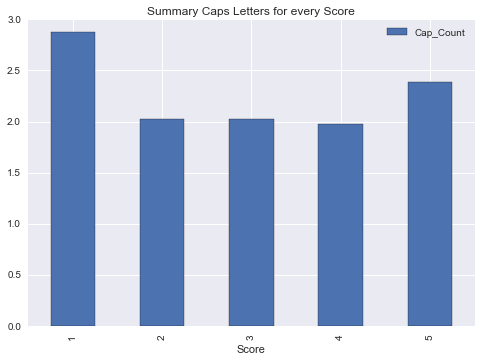

In [70]:
scr_cap = review_df.loc[0::,['Score','Cap_Count']]
scr_cap_grp = scr_cap.groupby('Score')
scr_cap_grp.mean().plot(kind='bar',title='Summary Caps Letters for every Score')

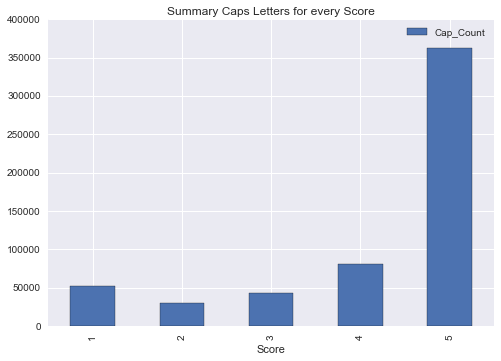

In [71]:
scr_cap_grp.count().plot(kind='bar',title='Summary Caps Letters for every Score')

In [72]:
del review_df['Text']

KeyError: 'Text'

In [73]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Cap_Count
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263,0,4
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190,0,2
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509,0,1
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219,0,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140,0,1


In [74]:
review_df=review_df.rename(columns={'Cap_Count':'Summary_Cap_Count'})
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Summary_Cap_Count
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263,0,4
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190,0,2
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509,0,1
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219,0,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140,0,1


In [75]:
def rate(x):
    if x>3:
        y='positive'
    elif x<3:
        y='negative'
    elif x==3:
        y='neutral'
    return y
review_df['Rating']=review_df.Score.apply(rate)

In [76]:
review_df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Summary_Cap_Count,Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263,0,4,positive
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190,0,2,negative
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509,0,1,positive
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219,0,2,negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140,0,1,positive


In [77]:
df = review_df

In [78]:
df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Time,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Summary_Cap_Count,Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,0,4,2011,27,2,4,263,0,4,positive
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,0,9,2012,7,4,1,190,0,2,negative
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,0,8,2008,18,0,3,509,0,1,positive
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,0,6,2011,13,0,2,219,0,2,negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,0,10,2012,21,6,3,140,0,1,positive


In [79]:
df1=df.copy()

In [80]:
del df['Time']

In [81]:
df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Summary_Cap_Count,Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,0,4,2011,27,2,4,263,0,4,positive
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,0,9,2012,7,4,1,190,0,2,negative
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,0,8,2008,18,0,3,509,0,1,positive
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,0,6,2011,13,0,2,219,0,2,negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,0,10,2012,21,6,3,140,0,1,positive


In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
var_mod=['ProductId','UserId','month','year','day','day_of_week','week','Rating']

In [84]:
for var in var_mod:
    lb=LabelEncoder()
    full_var_data = df[var].astype('str')
    temp = lb.fit_transform(np.array(full_var_data))
    df[var] = lb.transform(np.array( df[var] ).astype('str'))  

In [85]:
df.head()

,ProductId,UserId,HelpNum,HelpDenum,Score,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Summary_Cap_Count,Rating
0,27619,188646,1,1,5,0,6,12,19,2,3,263,0,4,2
1,72383,25105,0,0,1,0,11,13,28,4,0,190,0,2,0
2,15267,210482,1,1,4,0,10,9,9,0,2,509,0,1,2
3,19718,152635,3,3,2,0,8,12,4,0,1,219,0,2,0
4,69007,57804,0,0,5,0,1,13,13,6,2,140,0,1,2


In [86]:
df.Text_Len.median()

301.0

In [87]:
del df['Score']

In [88]:
df.head()

,ProductId,UserId,HelpNum,HelpDenum,Unhelp,month,year,day,day_of_week,week,Text_Len,Exclam_Count,Summary_Cap_Count,Rating
0,27619,188646,1,1,0,6,12,19,2,3,263,0,4,2
1,72383,25105,0,0,0,11,13,28,4,0,190,0,2,0
2,15267,210482,1,1,0,10,9,9,0,2,509,0,1,2
3,19718,152635,3,3,0,8,12,4,0,1,219,0,2,0
4,69007,57804,0,0,0,1,13,13,6,2,140,0,1,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 14 columns):
ProductId            568454 non-null int64
UserId               568454 non-null int64
HelpNum              568454 non-null int64
HelpDenum            568454 non-null int64
Unhelp               568454 non-null int64
month                568454 non-null int64
year                 568454 non-null int64
day                  568454 non-null int64
day_of_week          568454 non-null int64
week                 568454 non-null int64
Text_Len             568454 non-null int64
Exclam_Count         568454 non-null int64
Summary_Cap_Count    568454 non-null int64
Rating               568454 non-null int64
dtypes: int64(14)
memory usage: 60.7 MB


In [90]:
dt=DecisionTreeClassifier()

In [91]:
columns=['ProductId','UserId','HelpNum','HelpDenum','Unhelp','month','year','day','day_of_week','week',\
        'Text_Len','Exclam_Count','Summary_Cap_Count','Rating']

In [92]:
df.columns=columns

In [93]:
predictors = ['ProductId','UserId','HelpNum','HelpDenum','Unhelp','month','year','day','day_of_week','week',\
            'Text_Len','Exclam_Count','Summary_Cap_Count']

In [94]:
x_train,x_test,y_train,y_test = train_test_split(df[predictors],df.Rating,test_size=0.5,random_state=992)

In [95]:
x_train.shape

(284227, 13)

In [96]:
x_test.shape

(284227, 13)

In [97]:
y_train.shape

(284227L,)

In [98]:
model=dt.fit(x_train,y_train)

In [112]:
import io
import pydot
from scipy import misc
from sklearn.tree import export_graphviz

In [113]:
def show_tree(decisionTree,filepath):
    dotfile = io.BytesIO()
    export_graphviz(decisionTree,out_file=dotfile)
    pydot.graph_from_dot_data(dotfile.getvalue()).write_png(filepath)
    i=misc.imread(filepath)
    plt.imshow(i)
show_tree(dt,'test.png')

KeyboardInterrupt: 

In [99]:
result2 = cross_val_score(dt,x_train,y_train,cv=10)

In [ ]:
result

In [ ]:
result2

In [ ]:
result.mean()

In [ ]:
pred=model.predict(x_test)

In [ ]:
accuracy_score(pred,y_test)

In [ ]:
print classification_report(pred,y_test)

In [ ]:
base=accuracy_score(pred,y_test)

In [ ]:
base

In [ ]:
base_class = classification_report(pred,y_test)

In [ ]:
print(base_class)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='auto')

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
result_lr = cross_val_score(lr,x_train,y_train,cv=10)

In [ ]:
result_lr

In [ ]:
result_lr.mean()

In [ ]:
pred_lr = model.predict(x_test)

In [581]:
lr_acc = accuracy_score(pred_lr,y_test)

In [582]:
lr_acc

0.77703736801922407

In [583]:
lr_class = classification_report(pred_lr,y_test)

In [584]:
print(lr_class)

             precision    recall  f1-score   support

          0       0.02      0.36      0.04      2589
          1       0.00      0.08      0.01      1178
          2       0.99      0.78      0.88    280460

avg / total       0.98      0.78      0.86    284227



In [585]:
lr_b = LogisticRegression(class_weight='balanced')

In [586]:
model_b = lr_b.fit(x_train,y_train)

In [587]:
result_b=cross_val_score(lr_b,x_train,y_train,cv=10)

In [588]:
result_b

array([ 0.79612299,  0.79429355,  0.79313256,  0.79081058,  0.78436478,
        0.78801633,  0.79311801,  0.79033847,  0.79001443,  0.79349777])

In [589]:
result_b.mean()

0.79137094654853501

In [590]:
pred_b = model_b.predict(x_test)

In [591]:
lr_b = accuracy_score(pred_b,y_test)

In [592]:
lr_b

0.79157504389097444

In [593]:
class_b = classification_report(pred_b,y_test)

In [594]:
print(class_b)

             precision    recall  f1-score   support

          0       0.17      0.60      0.26     11324
          1       0.01      0.13      0.02      1640
          2       0.98      0.80      0.88    271263

avg / total       0.94      0.79      0.85    284227



In [621]:
dt_bal = DecisionTreeClassifier(class_weight={1:10})
model_dt_bal = dt.fit(x_train,y_train)

In [623]:
result_dt_bal = cross_val_score(dt_bal,x_train,y_train,cv=10)

In [622]:
result_dt_bal

array([ 0.76354489,  0.76002674,  0.76125809,  0.76393189,  0.7610386 ,
        0.76261347,  0.76015059,  0.76124129,  0.75718659,  0.76059956])

In [624]:
pred_dt_bal = model_dt_bal.predict(x_test)

In [625]:
dt_bal = accuracy_score(pred_dt_bal,y_test)
dt_bal

0.76773494425230537

In [619]:
class_dt_bal = classification_report(pred_dt_bal,y_test)

In [620]:
print(class_dt_bal)

             precision    recall  f1-score   support

          0       0.50      0.47      0.48     43295
          1       0.37      0.33      0.35     23734
          2       0.86      0.87      0.86    217198

avg / total       0.76      0.77      0.76    284227



In [605]:
ratio = float(217034)/284227
ratio

0.7635938879839002

In [139]:
lr_i = LogisticRegression(class_weight='balanced',fit_intercept=True)

NameError: name 'LogisticRegression' is not defined

In [637]:
model_i=lr_i.fit(x_train,y_train)

In [638]:
result_i = cross_val_score(lr_i,x_train,y_train,cv=10)
result_i

array([ 0.78803124,  0.79598227,  0.78662398,  0.79404728,  0.78897372,
        0.7953418 ,  0.78601084,  0.79645333,  0.7943774 ,  0.7931811 ])

In [639]:
pred_i = model_i.predict(x_test)

In [640]:
lr_i = accuracy_score(pred_i,y_test)

In [641]:
lr_i

0.79640920813293603

In [642]:
class_i = classification_report(pred_i,y_test)

In [691]:
print(class_i)

             precision    recall  f1-score   support

          0       0.23      0.60      0.33     15471
          1       0.02      0.16      0.03      2331
          2       0.98      0.81      0.89    266425

avg / total       0.93      0.80      0.85    284227



In [114]:
2*2

4

In [176]:
from sklearn.ensemble import RandomForestClassifier
rac = RandomForestClassifier(class_weight='balanced',random_state=1,oob_score=False,n_estimators=40,verbose=3)

In [177]:
model=rac.fit(x_train,y_train)

building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40


[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   20.2s


building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   25.5s finished


In [178]:
result= cross_val_score(rac,x_train,y_train,cv=4)

building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40


[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   13.0s


building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40


[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   13.1s


building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   16.9s finished
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40


[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   13.5s


building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40


[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   13.2s


building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   16.7s finished
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


In [179]:
result

array([ 0.84889808,  0.84822044,  0.84935825,  0.84931603])

In [180]:
pred=model.predict(x_test)

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.3s finished


In [181]:
accuracy_score(pred,y_test)

0.85635073374450699

In [182]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.47      0.78      0.58     24466
          1       0.28      0.93      0.43      6375
          2       0.98      0.86      0.92    253386

avg / total       0.92      0.86      0.88    284227



In [175]:
rac

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=1, verbose=2, warm_start=False)

In [163]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1,n_estimators=100)

In [164]:
modelb=abc.fit(x_train,y_train)

In [165]:
resultb = cross_val_score(abc,x_train,y_train)
resultb

array([ 0.80313057,  0.80315168,  0.8041186 ])

In [166]:
predb = modelb.predict(x_test)
accuracy_score(predb,y_test)

0.80613031133565771

In [167]:
print(classification_report(predb,y_test))

             precision    recall  f1-score   support

          0       0.28      0.61      0.39     18966
          1       0.00      0.19      0.00        79
          2       0.98      0.82      0.89    265182

avg / total       0.93      0.81      0.86    284227

